In [2]:
# Run some setup code for this notebook.
import importlib
import Logistic
from Logistic import LogisticRegression
importlib.reload(Logistic)#类似于auto_reload


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [3]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [5]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
################################################################################
# TODO:                                                                        #
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value #
################################################################################
#按元素比例去除缺失值的通用函数：
def get_obj_index(df, i):
    index = np.where(
        np.random.multinomial(1, df.iloc[:, i].value_counts().values / df.iloc[:, i].value_counts().values.sum(),
                              size=1) == 1)[1][0]
    return df.iloc[:, i].value_counts().index[index]


#用均值或者按元素比例去除缺失值的通用函数：
def whr_fillna_biclassify(df):
    for i in range(len(df.columns)):
        if df.iloc[:, i].dtypes == 'object':  #按元素比例去除缺失值,而不是按众数
            for j in range(len(df.iloc[:, i])):
                if pd.isnull(df.iloc[j, i]):
                    df.iloc[j, i] = get_obj_index(df, i)
        elif df.iloc[:, i].dtypes == 'float64':
            df.iloc[:, i].fillna(df.iloc[:, i].mean(), inplace=True)
    df.isnull().sum()
    return df


df = whr_fillna_biclassify(df)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

## Encode 

In [7]:
################################################################################
# TODO:                                                                        #
# Task2 deal with categorical features
# Tip use pd.get_dummies. 
################################################################################
labels=df['Loan_Status'].map({'Y':1.,'N':0.})
df=df.drop('Loan_Status',axis=1)
df_encoded=pd.get_dummies(df,dtype='float64')
df_encoded['Loan_Status']=labels
#convert labels to float64
df_encoded
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,6000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
610,4106,0.0,40.000000,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
611,8072,240.0,253.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
612,7583,0.0,187.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


## Data process

In [8]:

################################################################################
# TODO:                                                                        #
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
################################################################################
df_encoded.iloc[:,:5]=(df_encoded.iloc[:,:5]-df_encoded.iloc[:,:5].mean())/df_encoded.iloc[:,:5].std()
# 按照labels的类别比例划分数据集
split_idx1=0.8
np.random.seed(0)
df_encoded=df_encoded.sample(frac=1,axis=0)#frac=1表示全部打乱,axis=0表示按行打乱,frac=0.5表示打乱一半
df_Y,df_N=df_encoded[df_encoded['Loan_Status']==1],df_encoded[df_encoded['Loan_Status']==0]
df_train_Y,df_train_N=df_Y.iloc[:int(len(df_Y)*split_idx1),:],df_N.iloc[:int(len(df_N)*split_idx1),:]
df_test_Y,df_test_N=df_Y.iloc[int(len(df_Y)*split_idx1):,:],df_N.iloc[int(len(df_N)*split_idx1):,:]
df_train=pd.concat([df_train_Y,df_train_N],axis=0)
df_test=pd.concat([df_test_Y,df_test_N],axis=0)
X_train,Y_train=df_train.iloc[:,:-1],df_train.iloc[:,-1]
X_test,Y_test=df_test.iloc[:,:-1],df_test.iloc[:,-1]
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

## Train

    iteration:0,    loss:3.40e+02
    iteration:1,    loss:2.97e+02
    iteration:2,    loss:2.79e+02
    iteration:3,    loss:2.69e+02
    iteration:4,    loss:2.61e+02
    iteration:5,    loss:2.56e+02
    iteration:6,    loss:2.51e+02
    iteration:7,    loss:2.48e+02
    iteration:8,    loss:2.45e+02
    iteration:9,    loss:2.42e+02
    iteration:10,    loss:2.41e+02
    iteration:11,    loss:2.39e+02
    iteration:12,    loss:2.38e+02
    iteration:13,    loss:2.36e+02
    iteration:14,    loss:2.35e+02
    iteration:15,    loss:2.35e+02
    iteration:16,    loss:2.34e+02
    iteration:17,    loss:2.33e+02
    iteration:18,    loss:2.33e+02
    iteration:19,    loss:2.32e+02
    iteration:20,    loss:2.32e+02
    iteration:21,    loss:2.31e+02
    iteration:22,    loss:2.31e+02
    iteration:23,    loss:2.30e+02
    iteration:24,    loss:2.30e+02
    iteration:25,    loss:2.30e+02
    iteration:26,    loss:2.30e+02
    iteration:27,    loss:2.29e+02
    iteration:28,    loss:2.29

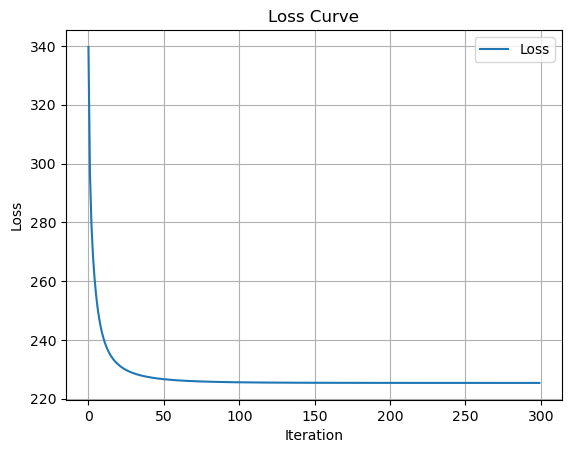

In [9]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt

################################################################################
# TODO:                                                                        #
# Task4 train your model and plot the loss curve of training
# You need to complete the Logistic.py file
# model = LogisticRegression()
################################################################################
Model = LogisticRegression()
Model.penalty = 'l2'
Model.gamma = 10
Losses = Model.fit(X_train, Y_train, lr=0.001, tol=1e-7, max_iter=300, decay=0.1)
y_pred_train = Model.predict(X_train)
plt.plot(Losses)
plt.grid()
plt.legend(['Loss'])
#显示横纵
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

## Test

In [10]:
################################################################################
# TODO:                                                                        #
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
################################################################################
y_pred_test = Model.predict(X_test)
print(f'test_acc:{Model.cal_accuracy(y_pred_test, Y_test)}')
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

test_acc:accuracy:82.2581%
